In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 

In [2]:
print("Loading data...")

Loading data...


In [3]:
print(os.listdir('./data/avg_rewards'))

['isaaclab_Isaac-Anymal-H1-Push-Direct-v0_mappo_test_seed-00002-2025-03-01-06-13-09_logs_train_episode_rewards_aver_rewards.csv', 'isaaclab_Isaac-Anymal-H1-Push-Direct-v0_mappo_test_seed-00004-2025-03-01-08-55-09_logs_train_episode_rewards_aver_rewards.csv', 'isaaclab_Isaac-Multi-Agent-Flat-Anymal-C-Direct-v0_happo_multi_agent_anymal_harl_seed-00003-2025-07-26-00-27-24_logs.csv', 'isaaclab_Isaac-Multi-Agent-Flat-Anymal-C-Direct-v0_mappo_multi_agent_anymal_harl_mappo_seed-00002-2025-07-29-16-53-28_logs.csv', 'shadowhand_happo_test_seed-00003-2025-02-28-15-24-33_logs_train_episode_rewards_aver_rewards.csv', 'isaaclab_Isaac-Multi-Agent-Flat-Anymal-C-Direct-v0_mappo_multi_agent_anymal_harl_mappo_seed-00003-2025-07-29-20-32-17_logs.csv', 'isaaclab_Isaac-Multi-Agent-Flat-Anymal-C-Direct-v0_mappo_multi_agent_anymal_harl_mappo_seed-00001-2025-07-29-13-13-04_logs.csv', 'shadowhand_mappo_test_seed-00004-2025-02-28-21-01-50_logs_train_episode_rewards_aver_rewards.csv', 'isaaclab_Isaac-Anymal-H1-P

In [4]:
anymal_bar_happo = []
anymal_bar_mappo = []
push_happo = []
push_mappo = []
hand_happo = []
hand_mappo = []

# analysis/data/avg_rewards/isaaclab_Isaac-Multi-Agent-Flat-Anymal-C-Direct-v0_happo_multi_agent_anymal_harl_seed-00001-2025-07-25-17-32-29_logs.csv
for i, filename in enumerate(os.listdir('./data/avg_rewards')):
    print(f"Processing file {i+1}/{len(os.listdir('./data/avg_rewards'))}: {filename}")
    filename_lower = filename.lower()
    # start_idx = filename.find('0000')
    df = pd.read_csv(os.path.join('./data/avg_rewards', filename))
    # df['seed'] = filename[start_idx:start_idx+5]
    if 'push' in filename_lower and 'happo' in filename_lower:
        push_happo.append(df)
    elif 'push' in filename_lower and 'mappo' in filename_lower:
        push_mappo.append(df)
    elif 'multi-agent' in filename_lower and 'happo' in filename_lower:
        # sample at the same rate 
        anymal_bar_happo.append(df[0:500:20])
    elif 'multi-agent' in filename_lower and 'mappo' in filename_lower:
        anymal_bar_mappo.append(df[0:500:20])
    elif 'hand' in filename_lower and 'happo' in filename_lower:
        hand_happo.append(df)
    elif 'hand' in filename_lower and 'mappo' in filename_lower:
        hand_mappo.append(df)
    else:
        print(f"Skipping file {filename} as it does not match any known pattern.")
    

push_happo = pd.concat(push_happo) if push_happo else None
push_mappo = pd.concat(push_mappo) if push_mappo else None
anymal_bar_happo = pd.concat(anymal_bar_happo) if anymal_bar_happo else None
anymal_bar_mappo = pd.concat(anymal_bar_mappo) if anymal_bar_mappo else None
hand_happo = pd.concat(hand_happo) if hand_happo else None
hand_mappo = pd.concat(hand_mappo) if hand_mappo else None

Processing file 1/18: isaaclab_Isaac-Anymal-H1-Push-Direct-v0_mappo_test_seed-00002-2025-03-01-06-13-09_logs_train_episode_rewards_aver_rewards.csv
Processing file 2/18: isaaclab_Isaac-Anymal-H1-Push-Direct-v0_mappo_test_seed-00004-2025-03-01-08-55-09_logs_train_episode_rewards_aver_rewards.csv
Processing file 3/18: isaaclab_Isaac-Multi-Agent-Flat-Anymal-C-Direct-v0_happo_multi_agent_anymal_harl_seed-00003-2025-07-26-00-27-24_logs.csv
Processing file 4/18: isaaclab_Isaac-Multi-Agent-Flat-Anymal-C-Direct-v0_mappo_multi_agent_anymal_harl_mappo_seed-00002-2025-07-29-16-53-28_logs.csv
Processing file 5/18: shadowhand_happo_test_seed-00003-2025-02-28-15-24-33_logs_train_episode_rewards_aver_rewards.csv
Processing file 6/18: isaaclab_Isaac-Multi-Agent-Flat-Anymal-C-Direct-v0_mappo_multi_agent_anymal_harl_mappo_seed-00003-2025-07-29-20-32-17_logs.csv
Processing file 7/18: isaaclab_Isaac-Multi-Agent-Flat-Anymal-C-Direct-v0_mappo_multi_agent_anymal_harl_mappo_seed-00001-2025-07-29-13-13-04_logs

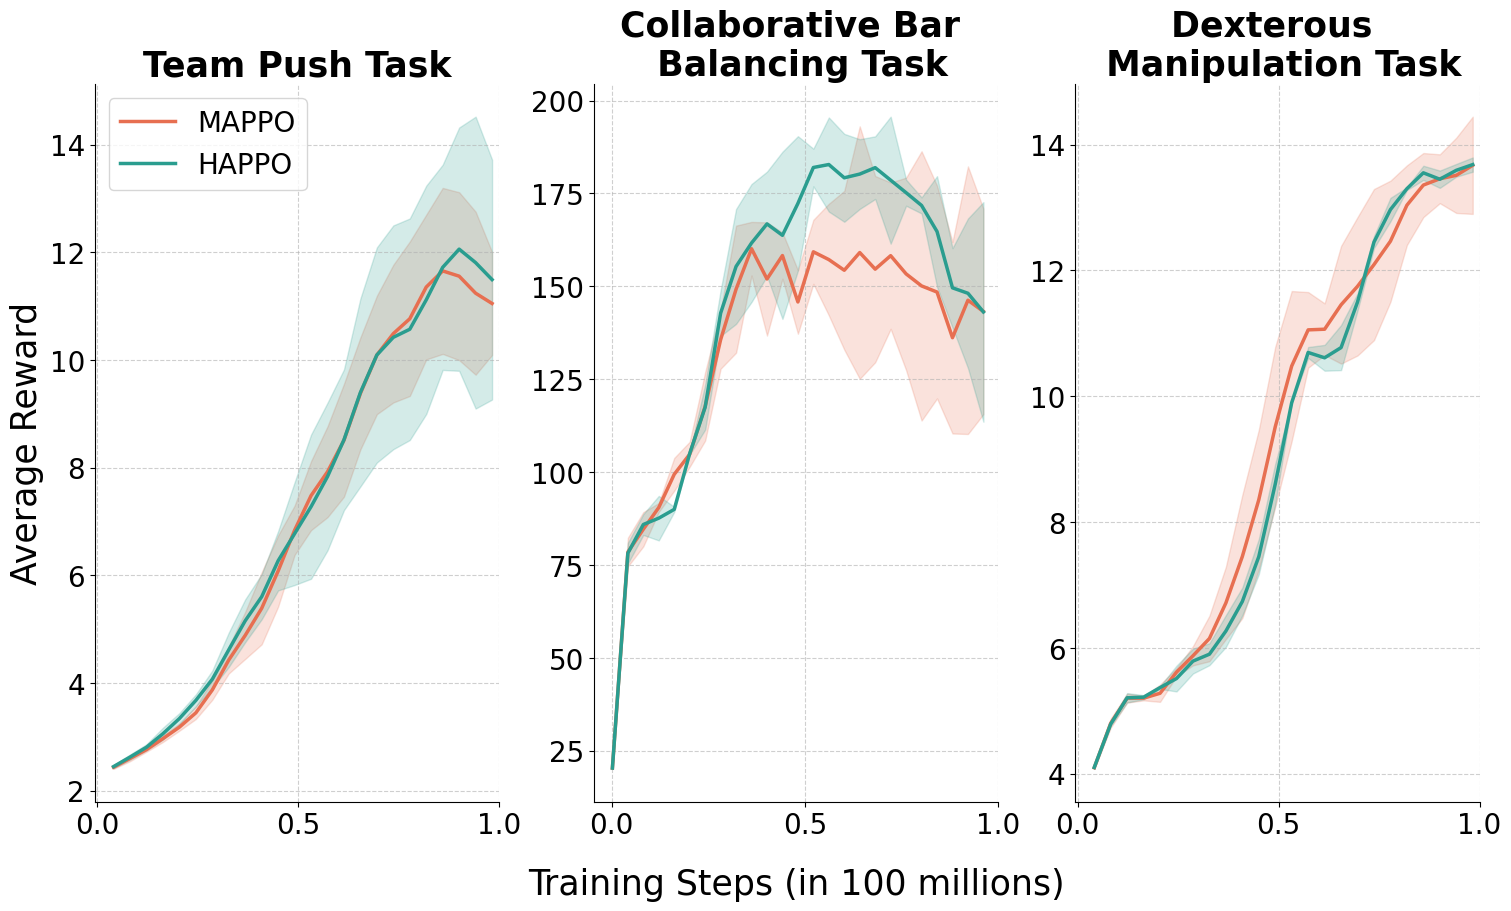

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create high-contrast plots as subplots
def plot_results(ax, data_mappo, data_happo, title, mappo_color, happo_color):
    x = np.array(sorted(data_mappo['Step'].unique())) / 1e8
    mean_mappo = data_mappo.groupby('Step')['Value'].mean().values
    std_mappo = data_mappo.groupby('Step')['Value'].std().values

    # Plot MAPPO with strong contrast
    ax.plot(x, mean_mappo, label="MAPPO", color=mappo_color, linewidth=2.5)
    ax.fill_between(x, mean_mappo - std_mappo, mean_mappo + std_mappo, alpha=0.2, color=mappo_color)

    mean_happo = data_happo.groupby('Step')['Value'].mean().values
    std_happo = data_happo.groupby('Step')['Value'].std().values

    # Plot HAPPO with strong contrast
    ax.plot(x, mean_happo, label="HAPPO", color=happo_color, linewidth=2.5)
    ax.fill_between(x, mean_happo - std_happo, mean_happo + std_happo, alpha=0.2, color=happo_color)

    # Improve aesthetics
    # ax.set_xlabel("Training Steps", fontsize=12)
    # ax.set_ylabel("Reward", fontsize=12)
    ax.set_title(title, fontsize=25, fontweight="bold")
    ax.grid(True, linestyle="--", alpha=0.6)
    
    sns.despine(ax=ax)

# Distinct colors for high contrast
colors = {
    # "push": ("#E63946", "#1D3557"),   # Red vs. Deep Blue
    # "anymal": ("#F4A261", "#264653"), # Orange vs. Dark Teal
    # "hand": ("#E76F51", "#2A9D8F")    # Burnt Red vs. Green
    "push": ("#E76F51", "#2A9D8F"),   # Red vs. Deep Blue
    "anymal": ("#E76F51", "#2A9D8F"), # Orange vs. Dark Teal
    "hand": ("#E76F51", "#2A9D8F")    # Burnt Red vs. Green
}

# Create a single row of three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 9), constrained_layout=True)

# Apply the function to each subplot only if data is available
if push_mappo is not None and push_happo is not None:
    plot_results(axes[0], push_mappo, push_happo, "Team Push Task", colors["push"][0], colors["push"][1])
else:
    axes[0].set_title("No data for Push Task", fontsize=20)

if anymal_bar_mappo is not None and anymal_bar_happo is not None:
    plot_results(axes[1], anymal_bar_mappo, anymal_bar_happo, "Collaborative Bar \n Balancing Task", colors["anymal"][0], colors["anymal"][1])
else:
    axes[1].set_title("No data for Anymal Bar Task", fontsize=20)

if hand_mappo is not None and hand_happo is not None:
    plot_results(axes[2], hand_mappo, hand_happo, "Dexterous \n Manipulation Task", colors["hand"][0], colors["hand"][1])
else:
    axes[2].set_title("No data for Hand Task", fontsize=20)

axes[0].set_ylabel("Average Reward", fontsize=25)
axes[1].set_xlabel("Training Steps (in 100 millions)", fontsize=25, labelpad=20)
axes[0].legend(fontsize=20, frameon=True)

for ax in axes:
    ax.tick_params(axis='both', labelsize=20)
    # plot only the 1st Mil items
    ax.set_xlim(right=1.0)
# plt.tight_layout()
# Show the final figure
plt.show()